Generates a table for bursts over dist-hls val sites and adjacent.

In [18]:
import geopandas as gpd
import pandas as pd
from dem_stitcher.geojson_io import read_geojson_gzip
from dem_stitcher.rio_tools import reproject_arr_to_match_profile

In [19]:
df_rtc = pd.read_parquet('../M_dataloader_v3/rtc_s1_tables/rtc_s1_table.parquet')
df_rtc.head()

,rtc_s1_id,input_slc_id,jpl_burst_id,bursts_per_slc_input,rtc_s1_vv_url,rtc_s1_vh_url,rtc_s1_h5_url,acq_datetime
0,OPERA_L2_RTC-S1_T005-008688-IW2_20201010T00400...,S1A_IW_SLC__1SDV_20201010T004001_20201010T0040...,T005-008688-IW2,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-10-10 00:40:01
1,OPERA_L2_RTC-S1_T005-008688-IW2_20201022T00400...,S1A_IW_SLC__1SDV_20201022T004000_20201022T0040...,T005-008688-IW2,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-10-22 00:40:00
2,OPERA_L2_RTC-S1_T005-008688-IW2_20201103T00400...,S1A_IW_SLC__1SDV_20201103T004000_20201103T0040...,T005-008688-IW2,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-11-03 00:40:00
3,OPERA_L2_RTC-S1_T005-008688-IW2_20201115T00400...,S1A_IW_SLC__1SDV_20201115T004000_20201115T0040...,T005-008688-IW2,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-11-15 00:40:00
4,OPERA_L2_RTC-S1_T005-008688-IW2_20201127T00400...,S1A_IW_SLC__1SDV_20201127T004000_20201127T0040...,T005-008688-IW2,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-11-27 00:40:00


In [20]:
df_burst_all = read_geojson_gzip('../A_download_burst_data/opera_burst_ids.geojson.zip')
df_burst_all['jpl_burst_id'] = df_burst_all.burst_id_jpl.str.upper().str.replace('_', '-')
df_burst_all = df_burst_all[['jpl_burst_id', 'geometry']].copy()
df_burst_all.head()

,jpl_burst_id,geometry
0,T001-000025-IW1,"POLYGON ((2.53190 4.75701, 3.29631 4.91201, 3...."
1,T001-000025-IW2,"POLYGON ((3.25912 4.97460, 4.06055 5.13657, 4...."
2,T001-000025-IW3,"POLYGON ((4.02659 5.18854, 4.73485 5.32978, 4...."
3,T001-000026-IW1,"POLYGON ((2.49611 4.92361, 3.26087 5.07851, 3...."
4,T001-000026-IW2,"POLYGON ((3.22392 5.14115, 4.02565 5.30297, 3...."


In [23]:
gdf_rtc = pd.merge(df_burst_all, df_rtc, on='jpl_burst_id', how='inner')
gdf_rtc.head()

,jpl_burst_id,geometry,rtc_s1_id,input_slc_id,bursts_per_slc_input,rtc_s1_vv_url,rtc_s1_vh_url,rtc_s1_h5_url,acq_datetime
0,T005-008688-IW2,"POLYGON ((-97.90103 16.86358, -97.06559 17.014...",OPERA_L2_RTC-S1_T005-008688-IW2_20201010T00400...,S1A_IW_SLC__1SDV_20201010T004001_20201010T0040...,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-10-10 00:40:01
1,T005-008688-IW2,"POLYGON ((-97.90103 16.86358, -97.06559 17.014...",OPERA_L2_RTC-S1_T005-008688-IW2_20201022T00400...,S1A_IW_SLC__1SDV_20201022T004000_20201022T0040...,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-10-22 00:40:00
2,T005-008688-IW2,"POLYGON ((-97.90103 16.86358, -97.06559 17.014...",OPERA_L2_RTC-S1_T005-008688-IW2_20201103T00400...,S1A_IW_SLC__1SDV_20201103T004000_20201103T0040...,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-11-03 00:40:00
3,T005-008688-IW2,"POLYGON ((-97.90103 16.86358, -97.06559 17.014...",OPERA_L2_RTC-S1_T005-008688-IW2_20201115T00400...,S1A_IW_SLC__1SDV_20201115T004000_20201115T0040...,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-11-15 00:40:00
4,T005-008688-IW2,"POLYGON ((-97.90103 16.86358, -97.06559 17.014...",OPERA_L2_RTC-S1_T005-008688-IW2_20201127T00400...,S1A_IW_SLC__1SDV_20201127T004000_20201127T0040...,27,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,https://opera-pst-rs-pop1.s3.us-west-2.amazona...,2020-11-27 00:40:00


In [25]:
df_bursts_of_interest = gdf_rtc.drop_duplicates(subset='jpl_burst_id', keep='first').reset_index(drop=True)
df_bursts_of_interest = df_bursts_of_interest[['jpl_burst_id', 'geometry']].copy()

<Axes: >

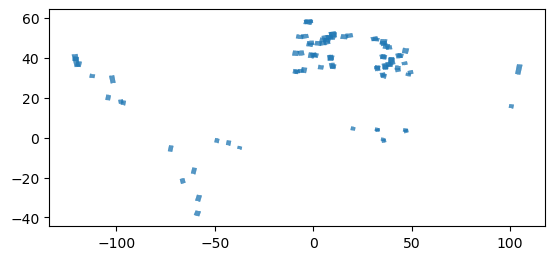

In [26]:
df_bursts_of_interest.plot()

In [38]:
df_bursts_of_interest.to_parquet('val_bursts.parquet')
df_bursts_of_interest.shape, gdf_rtc.shape

((3429, 2), (266955, 9))

# Generate RTC Urls

In [36]:
burst_ids = df_bursts_of_interest.jpl_burst_id.tolist()
burst_ids[:30]

['T005-008688-IW2',
 'T005-008688-IW3',
 'T005-008689-IW1',
 'T005-008689-IW2',
 'T005-008689-IW3',
 'T005-008690-IW1',
 'T005-008690-IW2',
 'T005-008690-IW3',
 'T005-008691-IW1',
 'T005-008691-IW2',
 'T005-008691-IW3',
 'T005-008692-IW1',
 'T005-008692-IW2',
 'T005-008692-IW3',
 'T005-008693-IW1',
 'T005-008693-IW2',
 'T005-008693-IW3',
 'T005-008694-IW1',
 'T005-008694-IW2',
 'T005-008694-IW3',
 'T005-008695-IW1',
 'T005-008695-IW2',
 'T005-008695-IW3',
 'T005-008696-IW1',
 'T005-008696-IW2',
 'T005-008696-IW3',
 'T005-008697-IW1',
 'T005-008697-IW2',
 'T005-008697-IW3',
 'T005-008698-IW1']

In [35]:
response = asf.search(operaBurstID=burst_ids[-10:], processingLevel='RTC')
response

ASFSearchResults([])